In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [59]:
df = pd.read_csv(r"C:\Users\wasim\tourism_package\data\Travel.csv")

In [60]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Column Information
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer

# Exploratory Data Analysis 

## Descriptive Analysis
- Number of rows and columns
- Data type of features and does it makes sense
- Null values?
- Distribution
- Outliers?
- Mean and variance
- Understand Values

In [61]:
df.shape

(4888, 20)

In [62]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

**Note: All the floats values can be converted to the int as it does not have values after point**

In [63]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Note: There are 8 columns which has null values, so it will be fun to handle them**

### Distribution and skewness

In [64]:
# Seperate the numerical and categorical columns

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

continuous_columns = [i for i in df.columns if df[i].nunique() > 8]

continuous_columns

['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

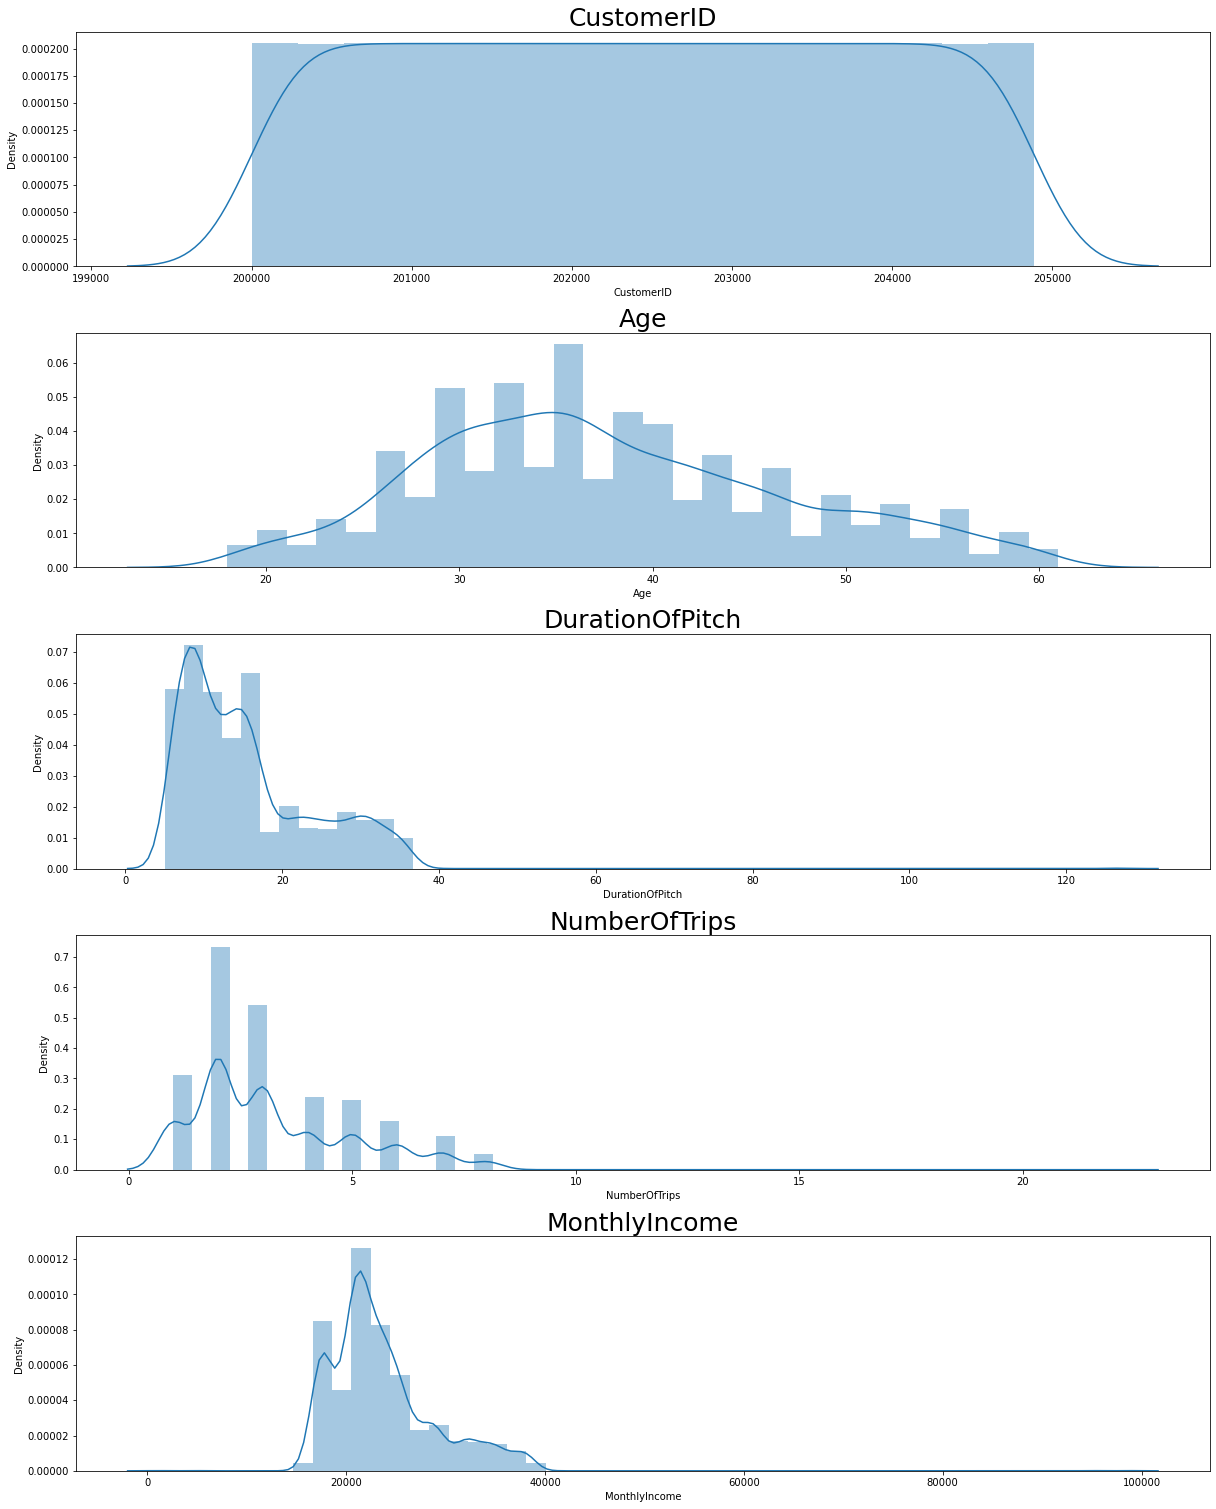

In [65]:
plt.figure(figsize=(17,75))

for i in range(len(continuous_columns)):
    plt.subplot(18,1,i+1)
    sns.distplot(df[continuous_columns[i]])
    plt.tight_layout()
    plt.title(continuous_columns[i],fontsize=25)

plt.show()


- Positiviely Skewed : DurationOfPitch, NumberOfTrips

In [66]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Exploration of Values

In [67]:
percentage = df.ProdTaken.value_counts(normalize=True)*100
pielabels = ["Bought","Not-Bought"]

# Plot PieChart with Ploty library
f1 = px.pie(values= percentage, names= pielabels, title="Percentage of package bought and not bought")
f1.update_traces(textposition="inside", textinfo="percent+label")
f1.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
f1.show()

-Target column is imbalanced

In [68]:
ranges = [18, 25, 35, 45, 55, 60]

not_taken_data = df[df['ProdTaken'] == 1]
print(not_taken_data.shape)

not_taken_cancelled = not_taken_data["ProdTaken"].groupby(pd.cut(df.Age, ranges)).count()
age_range_total = df["ProdTaken"].groupby(pd.cut(df.Age, ranges)).count()

not_taken_cancelled/age_range_total

(920, 20)


Age
(18, 25]    0.405405
(25, 35]    0.219945
(35, 45]    0.125000
(45, 55]    0.133075
(55, 60]    0.214660
Name: ProdTaken, dtype: float64

#### Note: 
- Age group of 18 to 25 buy most package
- Age between  35 to 55 is lowest, as in these age groups mostly there

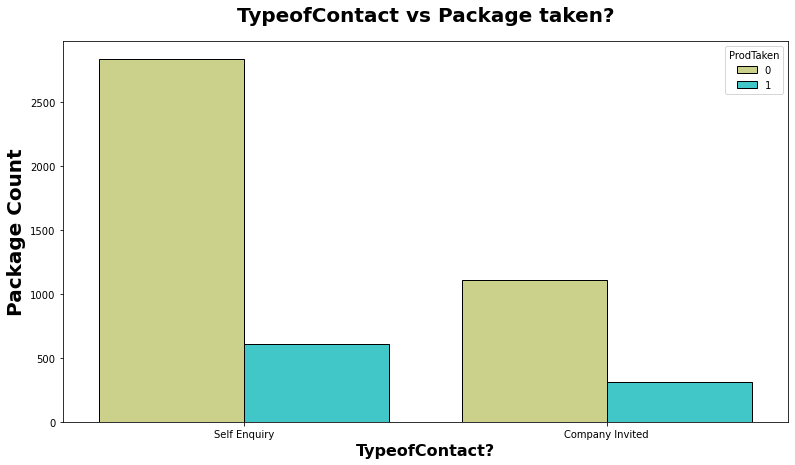

In [69]:
plt.subplots(figsize=(13,7))
sns.countplot(x="TypeofContact",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("TypeofContact vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("TypeofContact?", weight="bold", fontsize=16)
plt.show()

**Note:**
- The Self inquiry are much more than Company Invited, company just need to capitalized on self inquiry

In [70]:
df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

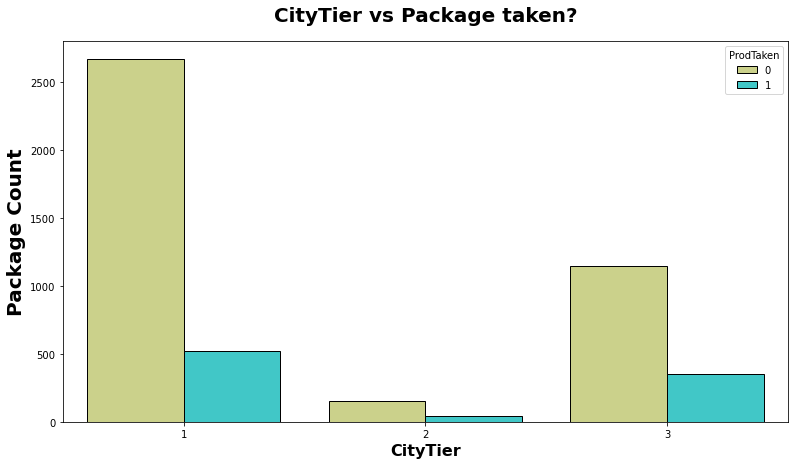

In [71]:
plt.subplots(figsize=(13,7))
sns.countplot(x="CityTier",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("CityTier vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("CityTier", weight="bold", fontsize=16)
plt.show()

- Intresting to see that, there are more package taken from the third tier than second tier.
- It shows how middle class lives

In [72]:
pitch_less_10_and_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 1 )]).shape[0]
pitch_less_10_and_not_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 0 )]).shape[0]

pitch_between_10_30_and_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 1 ) & (df['DurationOfPitch']>10)].shape[0]
pitch_between_10_30_and_not_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 0) & (df['DurationOfPitch']>10)].shape[0]

pitch_more_than_30_and_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 1 )].shape[0]
pitch_more_than_30_and_not_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 0)].shape[0]


total_package_taken = (df.loc[(df['ProdTaken'] == 1 )]).shape[0]

print(f"Total {pitch_less_10_and_taken + pitch_less_10_and_not_taken} talks for less than 10 minutes and only {pitch_less_10_and_taken} were bought which is about {pitch_less_10_and_taken/(pitch_less_10_and_taken + pitch_less_10_and_not_taken)}")
print(f"Total {pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken} talks for between 10 and 30 minutes and only {pitch_between_10_30_and_taken} were bought which is about {pitch_between_10_30_and_taken/(pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken)}")
print(f"Total {pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken} talks for more than 30 minutes and only {pitch_more_than_30_and_taken} were bought which is about {pitch_more_than_30_and_taken/(pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken)}")
print('\n')
print(f"Out of total {total_package_taken} packages, {pitch_less_10_and_taken/total_package_taken} comes from talking less than 10 minutes, {pitch_between_10_30_and_taken/total_package_taken} comes from talking between 10 minutes and 30 minutes, and {pitch_more_than_30_and_taken/total_package_taken} comes from talking more than 30 minutes")

Total 1471 talks for less than 10 minutes and only 226 were bought which is about 0.15363698164513936
Total 2451 talks for between 10 and 30 minutes and only 488 were bought which is about 0.19910240718074254
Total 376 talks for more than 30 minutes and only 86 were bought which is about 0.22872340425531915


Out of total 920 packages, 0.24565217391304348 comes from talking less than 10 minutes, 0.5304347826086957 comes from talking between 10 minutes and 30 minutes, and 0.09347826086956522 comes from talking more than 30 minutes


**Note:**
- It's obvious to see very few people talk more than 30 minutes and still they are talking more than 30 minutes, buying ratio is same
- Most people talk between 10 minutes, in which most might be genuine customer and this pitch time range covers more than 50% of total package taken 

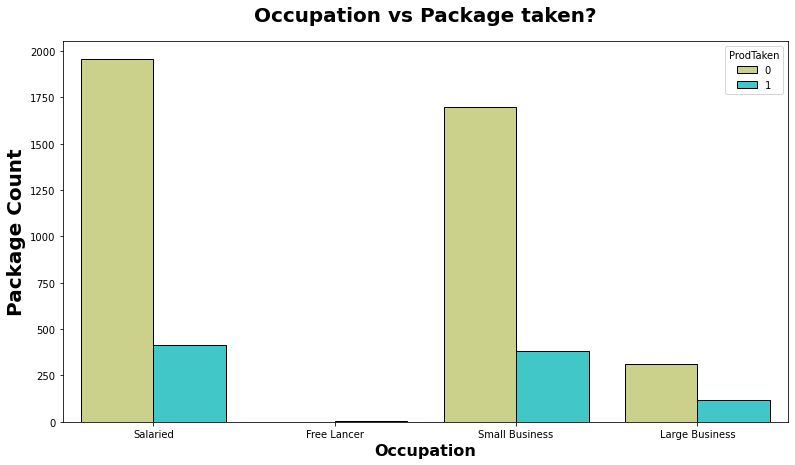

In [73]:
plt.subplots(figsize=(13,7))
sns.countplot(x="Occupation",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Occupation vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Occupation", weight="bold", fontsize=16)
plt.show()

**Note:**
- All these results, seems like we have seen them in real life
- Salaried people are most, as they are secured and want some break
- We all know most of the small business owner have the policy of earn and live a life
- In the Large Business, there are very few package taken, but they seems to be sorted and their ratio of total inquiry seems to be more
- Company is lacking Freelancer inquiries, really need to work on that

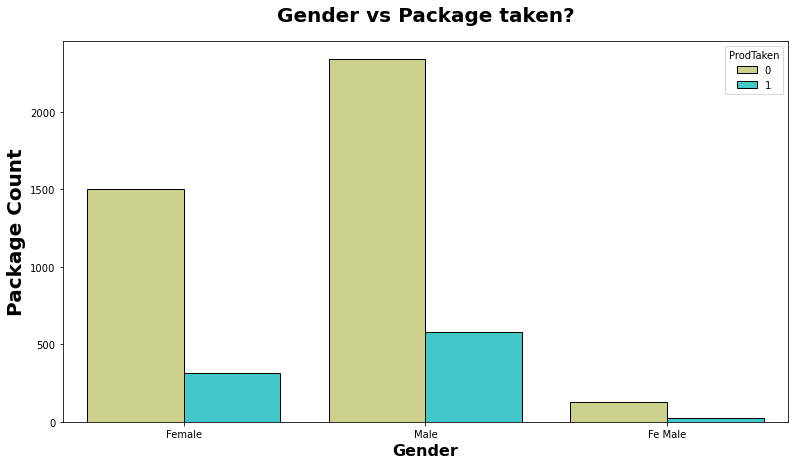

In [74]:
"""
I don't think gender would have more bias on buying package, but let's check
"""

plt.subplots(figsize=(13,7))
sns.countplot(x="Gender",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Gender vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

- For female, it seem that it has two values, need to replace it and then replot it 

In [75]:
df['Gender'].replace({'Fe Male': 'Female'}, inplace=True)

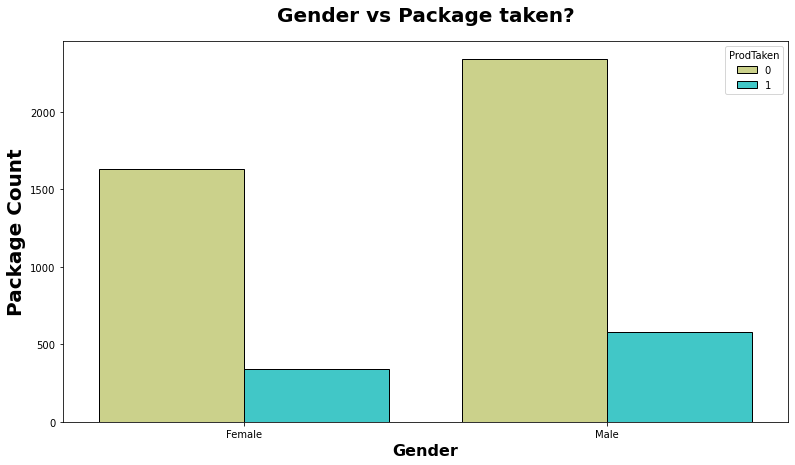

In [76]:
plt.subplots(figsize=(13,7))
sns.countplot(x="Gender",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Gender vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

**Note:**
- As it can be seen, there doesn't seem to difference in ration of package bought by male or female
- But we can see, amount of inquiry by female is less than male, sexism 

In [77]:
df['NumberOfPersonVisiting'].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

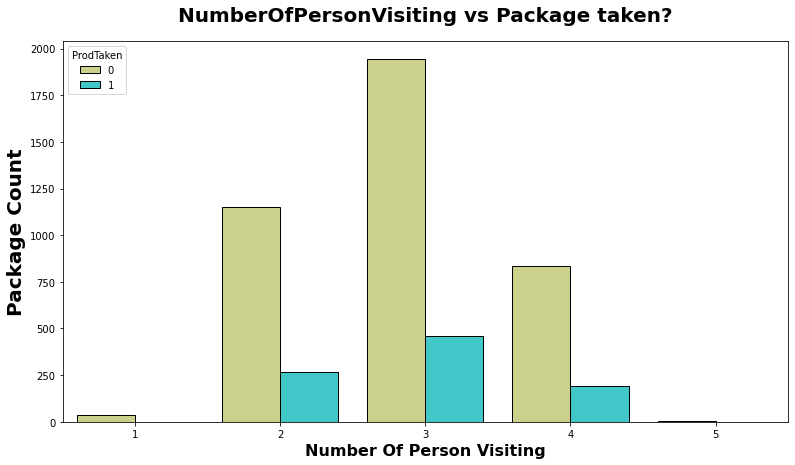

In [78]:
plt.subplots(figsize=(13,7))
sns.countplot(x="NumberOfPersonVisiting",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("NumberOfPersonVisiting vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Person Visiting", weight="bold", fontsize=16)
plt.show()

**Note:**
- This data also shows that most inquiries has 3 people, really need to control Population.
- Out of more than 4500 records, only 39 people has one child 

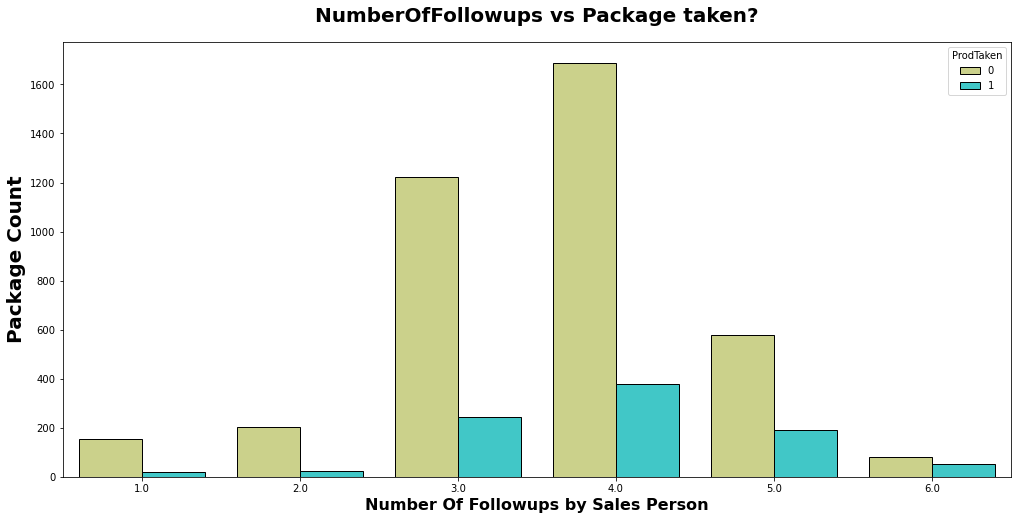

In [79]:
plt.subplots(figsize=(17,8))
sns.countplot(x="NumberOfFollowups",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("NumberOfFollowups vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Followups by Sales Person", weight="bold", fontsize=16)
plt.show()

I want to see like if sales person is making 4 follow ups, then Is the ratio of buying is more and graph unable to show that

In [80]:
for i in range(1, 7):
    followup_taken = df.loc[(df['NumberOfFollowups'] == i) & (df['ProdTaken'] == 1)].shape[0]
    followup_all= df.loc[(df['NumberOfFollowups'] == i)].shape[0]

    followup_ratio = followup_taken/followup_all

    print(f"For the follow up {i}, total number is {followup_all} and ratio is {followup_ratio}")


For the follow up 1, total number is 176 and ratio is 0.11363636363636363
For the follow up 2, total number is 229 and ratio is 0.10480349344978165
For the follow up 3, total number is 1466 and ratio is 0.1664392905866303
For the follow up 4, total number is 2068 and ratio is 0.1832688588007737
For the follow up 5, total number is 768 and ratio is 0.24869791666666666
For the follow up 6, total number is 136 and ratio is 0.39705882352941174


**Note:**
- Very Few inquiries has been followed for 6 times, and they have the highes ratio
- It seem like in the second followups, people confused people has said no
- It really good to see very few people went after just 1 follow up, it shows sales team is working well

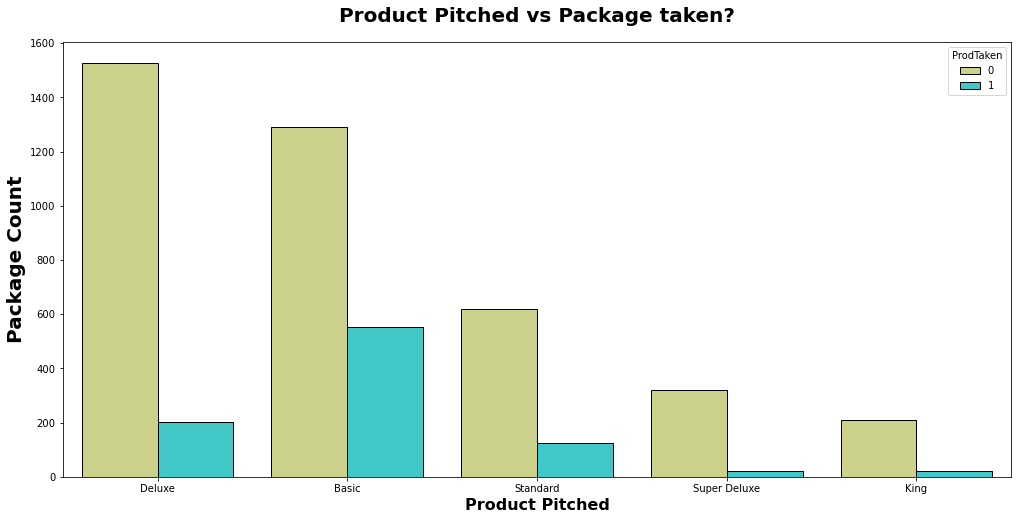

In [81]:
plt.subplots(figsize=(17,8))
sns.countplot(x="ProductPitched",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Product Pitched vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Product Pitched", weight="bold", fontsize=16)
plt.show()

**Note:**
- Super Deluxe and King are pitched very less and their buying count seems to be very low, need to work on this
- Deluxe is pitched maximum but not bought and Basic is pitched less and count of buying is also good.
- So, need to pitched more standard, super Deluxe and King. And less focus on Deluxe

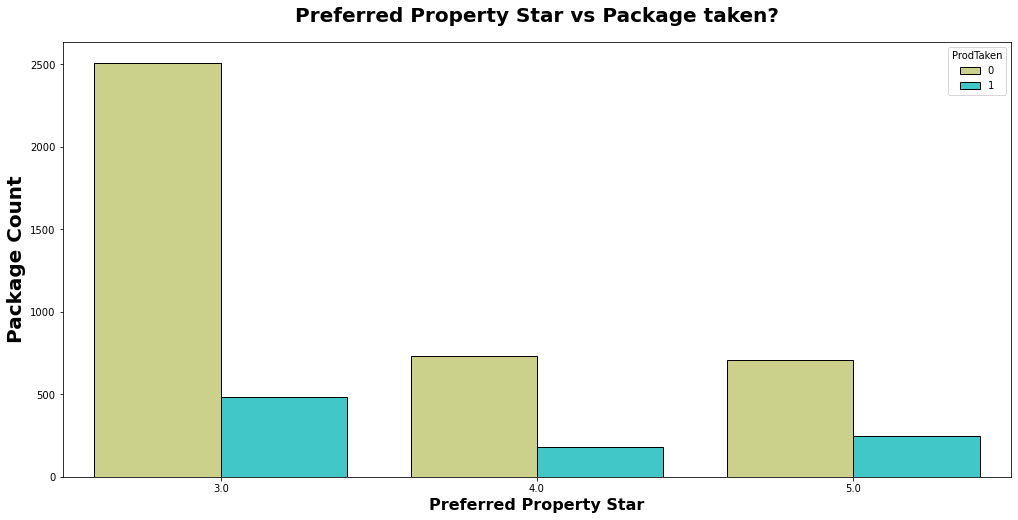

In [82]:
plt.subplots(figsize=(17,8))
sns.countplot(x="PreferredPropertyStar",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Preferred Property Star vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Preferred Property Star", weight="bold", fontsize=16)
plt.show()

One thing one can do is compare preferred property star and product pitched

In [83]:
for i in range(3, 6):
    property_count = df['ProductPitched'].loc[(df['PreferredPropertyStar'] == i)]
    print(f"Product pitched for property {i}")
    print(property_count.value_counts()) 
    print('\n')

Product pitched for property 3
Basic           1118
Deluxe          1090
Standard         436
Super Deluxe     212
King             137
Name: ProductPitched, dtype: int64


Product pitched for property 4
Basic           368
Deluxe          312
Standard        130
Super Deluxe     62
King             41
Name: ProductPitched, dtype: int64


Product pitched for property 5
Basic           355
Deluxe          329
Standard        175
Super Deluxe     68
King             29
Name: ProductPitched, dtype: int64




**Note:**
- One thing I am finding strange is suggesting Basic and deluxe
- For business to improve, need to suggest Super Deluxe and King to the client who prefer 5 stars

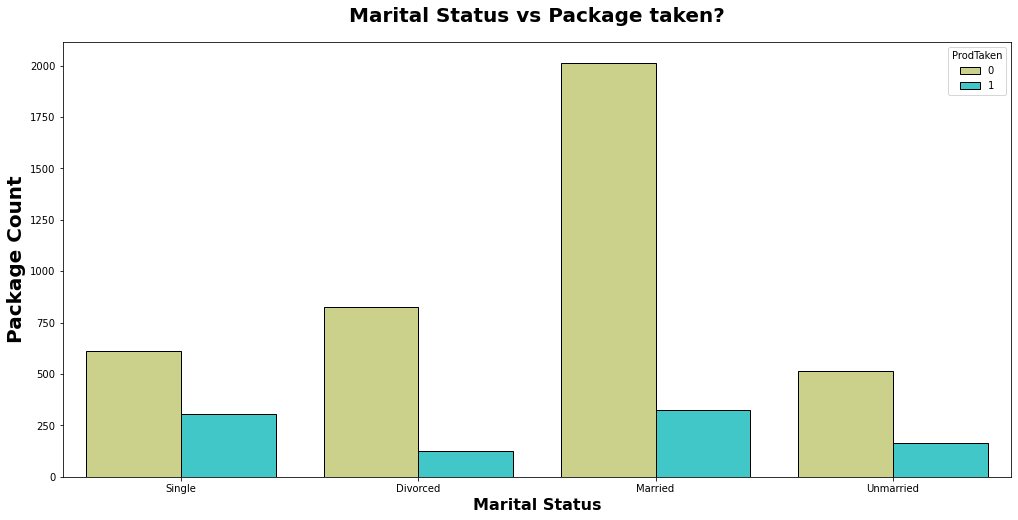

In [84]:
plt.subplots(figsize=(17,8))
sns.countplot(x="MaritalStatus",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Marital Status vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

**Note:**
- Single person with job is an ideal inquirer 
- Married person seemed to be confused and so they are inquiring but don't buy it
- Sales team need to work on to handle married inquirer 

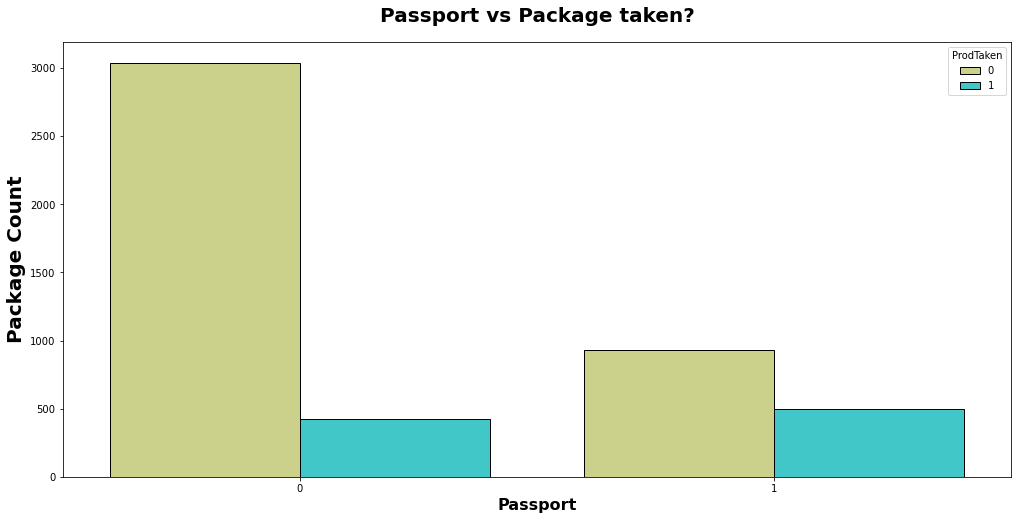

In [85]:
plt.subplots(figsize=(17,8))
sns.countplot(x="Passport",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Passport vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.show()

**Note:**
- Some outliers can be seen from this graph
- Company seems to be new as very few seems to be taken trips more than 5
- And they are achieving the customers, so 2 and 3 number of trips taken are more

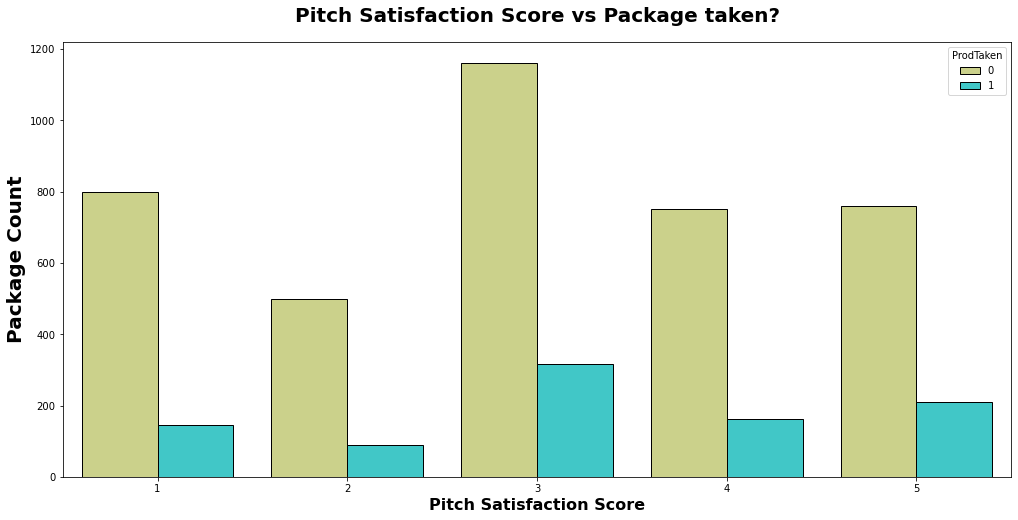

In [86]:
plt.subplots(figsize=(17,8))
sns.countplot(x="PitchSatisfactionScore",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Pitch Satisfaction Score vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Pitch Satisfaction Score", weight="bold", fontsize=16)
plt.show()


Many customers are giving pitch score less than or equal to three, need to understand more about it

In [87]:
pitch_score_less_equal_3_taken = df.loc[(df['PitchSatisfactionScore'] <= 2) & (df['ProdTaken'] == 1)].shape[0]
pitch_score_less_equal_3_all = df.loc[(df['PitchSatisfactionScore'] <= 2)].shape[0]

pitch_score_more_3_taken = df.loc[(df['PitchSatisfactionScore'] >= 3) & (df['ProdTaken'] == 1)].shape[0]
pitch_score_more_3_all = df.loc[(df['PitchSatisfactionScore'] >= 3)].shape[0]

print(f"Ratio for the person with pitch less than or equal to 2 pitch rating score and buying package is {pitch_score_less_equal_3_taken/pitch_score_less_equal_3_all}")
print(f"Ratio for the person with pitch more than or equal to 3 pitch rating score and buying package is {pitch_score_more_3_taken/pitch_score_more_3_all}")


Ratio for the person with pitch less than or equal to 2 pitch rating score and buying package is 0.1518324607329843
Ratio for the person with pitch more than or equal to 3 pitch rating score and buying package is 0.20476190476190476


**Note:**
- There are many ratings score less than or equal to 2, and there is difference of around 5% in the buying ration
- Sales team really need to put on efforts

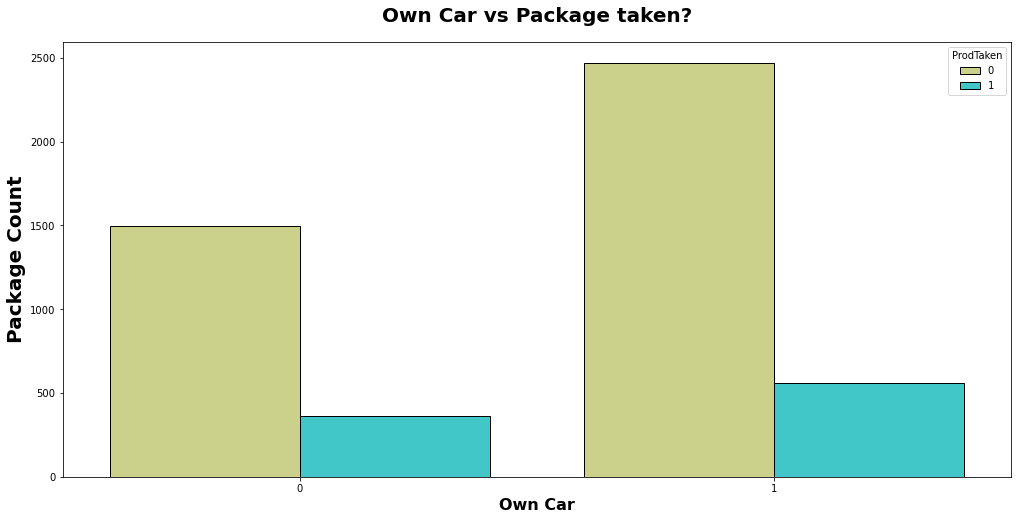

In [88]:
plt.subplots(figsize=(17,8))
sns.countplot(x="OwnCar",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Own Car vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Own Car", weight="bold", fontsize=16)
plt.show()


**Note:**
- There has been many inquiries from the customer who can afford car, but we are unable to capitalized on them 

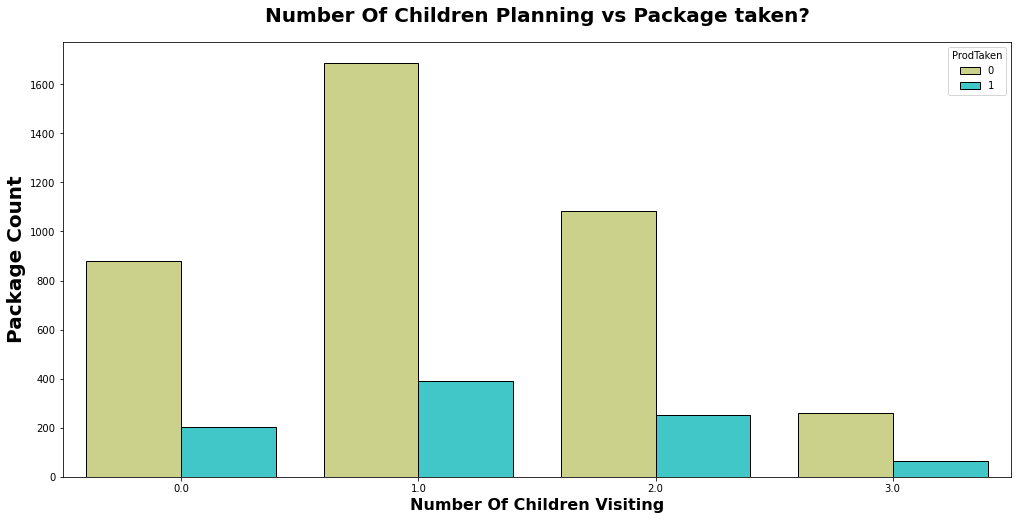

In [91]:
plt.subplots(figsize=(17,8))
sns.countplot(x="NumberOfChildrenVisiting",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Number Of Children Planning vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Children Visiting", weight="bold", fontsize=16)
plt.show()

**Note:**
- Don't think the number of children visiting affect the person buying the package, but will try to analyse more in correlation part

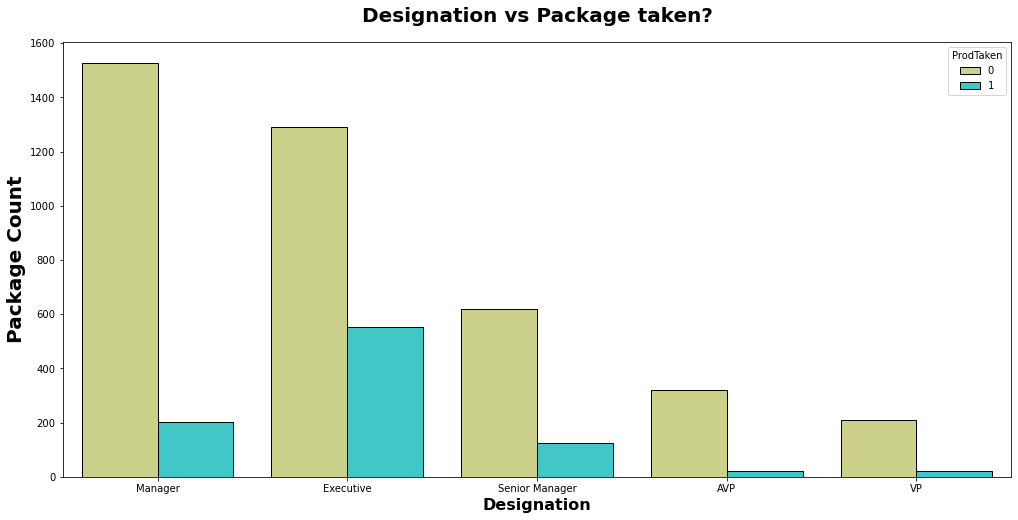

In [90]:
plt.subplots(figsize=(17,8))
sns.countplot(x="Designation",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("Designation vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Designation", weight="bold", fontsize=16)
plt.show()

**Note:**
- Company is getting the most inquiries from Mannager and executive. 

## Null and duplicate Values  
- If there are null values, how you will prepare it

## Outliers
- If there are outliers, remove them

## Correlations/Relationships
- Correlation with target variable
- Multi-collinearity

## Feature Engineering and Prepare data for Model
- Is it possible to create new features
- Transform Numberical Values if require
- Handle Categorical values